**Importing required libraries.**

In [269]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

**Loading Data.**

In [270]:
df_breast = pd.read_csv("data.csv")

**Printing the data.**

In [271]:
df_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [272]:
y = df_breast["diagnosis"]
y = np.array(y)
y[y == 'M'] = 1
y [y == 'B'] = 0
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [273]:
y = pd.Series(y)
y = y.astype('int')

In [274]:
X = df_breast.copy(deep = True)
# correlation analysis
X.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1, inplace = True)
X.corr()
# output

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [303]:
upper_tri = X.corr().where(np.triu(np.ones(X.corr().shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [276]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [277]:
X_new = X.drop(to_drop, axis=1, inplace = False)

In [278]:
X_new.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [279]:
x = X_new.copy(deep = True)

In [280]:
x.shape

(569, 23)

In [281]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   concave points_mean      569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

In [282]:
x.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,0.011796,0.020542,0.003795,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,0.006170,0.008266,0.002646,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,0.000000,0.007882,0.000895,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,0.007638,0.015160,0.002248,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,0.010930,0.018730,0.003187,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,0.014710,0.023480,0.004558,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,0.052790,0.078950,0.029840,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [283]:
x.isnull().sum()

radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [284]:
x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [285]:
x.tail()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,...,0.00000,0.02676,0.002783,30.37,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


0 => Benign


1 => Malignant **bold text**

In [286]:
print("0->", np.count_nonzero(y == 0))
print("1->", np.count_nonzero(y == 1))

0-> 357
1-> 212


In [287]:
df_breast.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [288]:
y = pd.Series(y)
y=y.astype('int')

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [290]:
print(x.shape, X_train.shape, X_test.shape)

(569, 23) (455, 23) (114, 23)


In [291]:
model = LogisticRegression()

In [292]:
# training the Logistic Regression model using Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [293]:
x.to_csv('raw_data.csv', index=False)

In [294]:
x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [295]:
#Begnin
input_data = (13.54,14.36,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,19.26,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

#Malignant
#input_data = (17.99,10.38,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Benign')

else:
  print('The Breast Cancer is Malignant')



[0]
The Breast cancer is Benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [296]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1])

In [297]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.912


**Precision**

In [298]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.907


**Recall**

In [299]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.867


In [300]:
print('F1 score: %.3f' % f1_score(Y_test, y_pred))

F1 score: 0.886


**Confusion Matrix**

In [301]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
print(cf_matrix)

[[65  4]
 [ 6 39]]


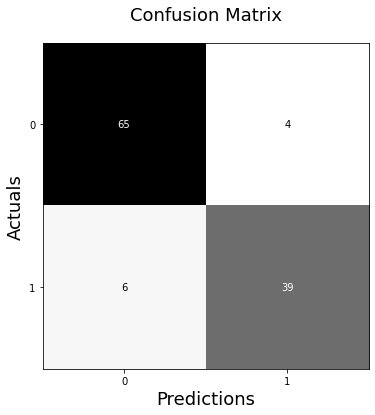

In [302]:
#ploting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix, figsize=(6, 6), cmap=plt.cm.binary)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()